# Deprecated: use plot_acc_all.ipynb
For paper, probably want to use matplotlib instead of plotly

In [1]:
import os
import pickle
import numpy as np
from numpy.linalg import LinAlgError

# utils for plotting
import plotly.graph_objects as go
import plotly.colors as colors

from helpers import get_ablation_scores

In [2]:
# score_dir = 'output/scores'
# fig_dir = 'output/figures'
score_dir = 'output_rebuttal_fig2/d=1/scores_cv'
# thin = 'kt'

# nadaraya watson
method = 'nw'
kernel = 'epanechnikov'

# # kernel ridge regression
# method = 'krr'
# kernel = 'gaussian'

ground_truth = 'sinexp'
logn_lo = 8
logn_hi = 14
n_trials = 100

In [3]:
results, names = get_ablation_scores(score_dir, method, kernel, ground_truth, logn_lo, logn_hi, n_trials)
print(len(results))

16


## Test MSE

In [7]:
fig = go.Figure()

colors_list = colors.qualitative.Plotly * (
    3 // len(colors.qualitative.Plotly) + 1
)
colors_used = set()

In [8]:
scale = 'log2'
baseline_loss = 1 #0.01 # = noise**2

for result in results:
    name = result['name']
    color = colors_list[names.index(name)]

    if scale == 'log2':
        y = np.log2(np.abs(result["scores"]))
        hline = np.log2(np.abs(baseline_loss))

    elif scale == 'linear':
        y = np.abs(result["scores"])
        hline = np.abs(baseline_loss)

    trace = go.Box(
        x=[result['logn']]*len(result["scores"]),
        y=y,
        name=name,
        # opacity=0.5,
        legendgroup=name,
        line_color=color,
        offsetgroup=name,
        showlegend=color not in colors_used,
        boxmean=True,
    )

    fig.add_trace(trace)
    colors_used.add(color)

# add line for baseline loss
fig.add_hline(
    y=hline,
    line_dash="dash",
)

fig.update_yaxes(title_text=f"{scale}(test MSE)")
fig.update_xaxes(title_text="log2(n)", type='linear')
fig.update_layout(
    width=800,
    height=600,
    title=f"Test MSE vs n (kernel={kernel}, ground_truth={ground_truth})",
    boxmode='group'
)

In [7]:
# save fig to file
fig_file = os.path.join(
    fig_dir,
    f"ablation-{method}-k={kernel}-gt={ground_truth}-logn={logn_lo}_{logn_hi}-t{n_trials}-test_mse.png"
)
fig.write_image(fig_file)

## Excess risk

In [8]:
fig = go.Figure()

colors_list = colors.qualitative.Plotly * (
    3 // len(colors.qualitative.Plotly) + 1
)
colors_used = set()

In [9]:

scale = 'log2'
baseline_loss = 0.01 # = noise**2

for result in results:
    name = result['name']
    color = colors_list[names.index(name)]
    excess_risk = np.array(result["scores"]) - baseline_loss

    if scale == 'log2':
        y = np.log2(excess_risk)
        hline = np.log2(np.abs(baseline_loss))

    elif scale == 'linear':
        y = excess_risk
        hline = np.abs(baseline_loss)

    trace = go.Box(
        x=[result['logn']]*len(result["scores"]),
        y=y,
        name=name,
        # opacity=0.5,
        legendgroup=name,
        line_color=color,
        offsetgroup=name,
        showlegend=color not in colors_used,
        boxmean=True,
    )

    fig.add_trace(trace)
    colors_used.add(color)

fig.update_yaxes(title_text=f"{scale}(excess risk)")
fig.update_xaxes(title_text="log2(n)", type='linear')
fig.update_layout(
    width=800,
    height=600,
    title=f"Excess risk vs n (kernel={kernel}, ground_truth={ground_truth})",
    boxmode='group'
)

In [10]:
# save fig to file
fig_file = os.path.join(
    fig_dir,
    f"ablation-{method}-k={kernel}-gt={ground_truth}-logn={logn_lo}_{logn_hi}-t{n_trials}-excess.png"
)
fig.write_image(fig_file)

## Matplotlib version

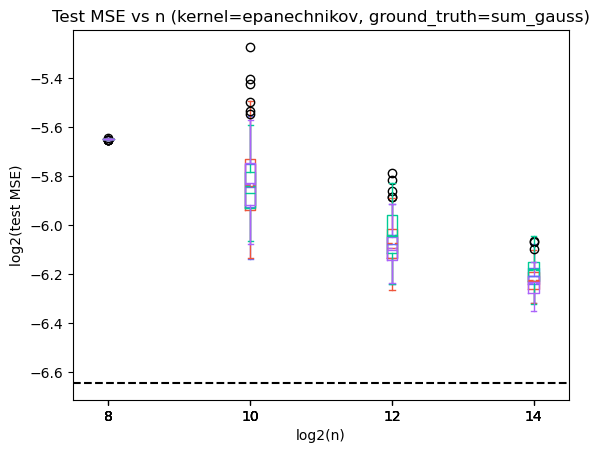

In [8]:
# make a matplotlib version of the above figure
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for result in results:
    name = result['name']
    color = colors_list[names.index(name)]

    if scale == 'log2':
        y = np.log2(np.abs(result["scores"]))
        hline = np.log2(np.abs(baseline_loss))

    elif scale == 'linear':
        hline = np.abs(baseline_loss)
        y = np.abs(result["scores"])

    ax.boxplot(
        y,
        positions=[result['logn']],
        showmeans=True,
        meanline=True,
        meanprops=dict(color=color),
        medianprops=dict(color=color),
        boxprops=dict(color=color),
        whiskerprops=dict(color=color),
        capprops=dict(color=color),
        flierprops=dict(marker='o', color=color),
    )

# add line for baseline loss
ax.axhline(
    y=hline,
    linestyle="--",
    color='black',
)

ax.set_xlabel("log2(n)")
ax.set_ylabel(f"{scale}(test MSE)")
ax.set_title(f"Test MSE vs n (kernel={kernel}, ground_truth={ground_truth})")
plt.show()

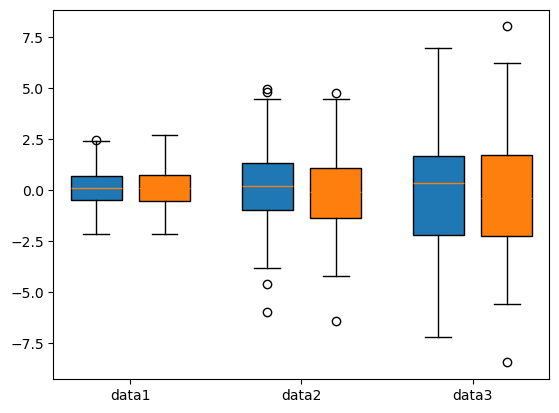

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Random data
np.random.seed(10)
data1 = [np.random.normal(0, std, 100) for std in range(1, 4)]
data2 = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig, ax = plt.subplots()

# Create an array with the colors you want to use
colors = ["#1f77b4", "#ff7f0e"]

# Set your custom color palette
customPalette = dict(zip(["data1", "data2"], colors))

plots = []
for name, data in [("data1", data1), ('data2', data2)]:
    # Create boxplot
    offset = -0.4 if name == 'data1' else 0.4
    bp = ax.boxplot(
        data, 
        positions=np.array(range(len(data)))*2.0+offset, 
        widths=0.6, 
        patch_artist=True, 
        boxprops=dict(facecolor=customPalette[name])
    )
    plots.append(bp)
# bp2 = ax.boxplot(
#     data2, 
#     positions=np.array(range(len(data2)))*2.0+0.4, 
#     widths=0.6, 
#     patch_artist=True, 
#     boxprops=dict(facecolor=customPalette["data2"])
# )

# Set labels
ax.set_xticks(range(0, len(data1) * 2, 2))
ax.set_xticklabels(['data1', 'data2', 'data3'])

plt.show()

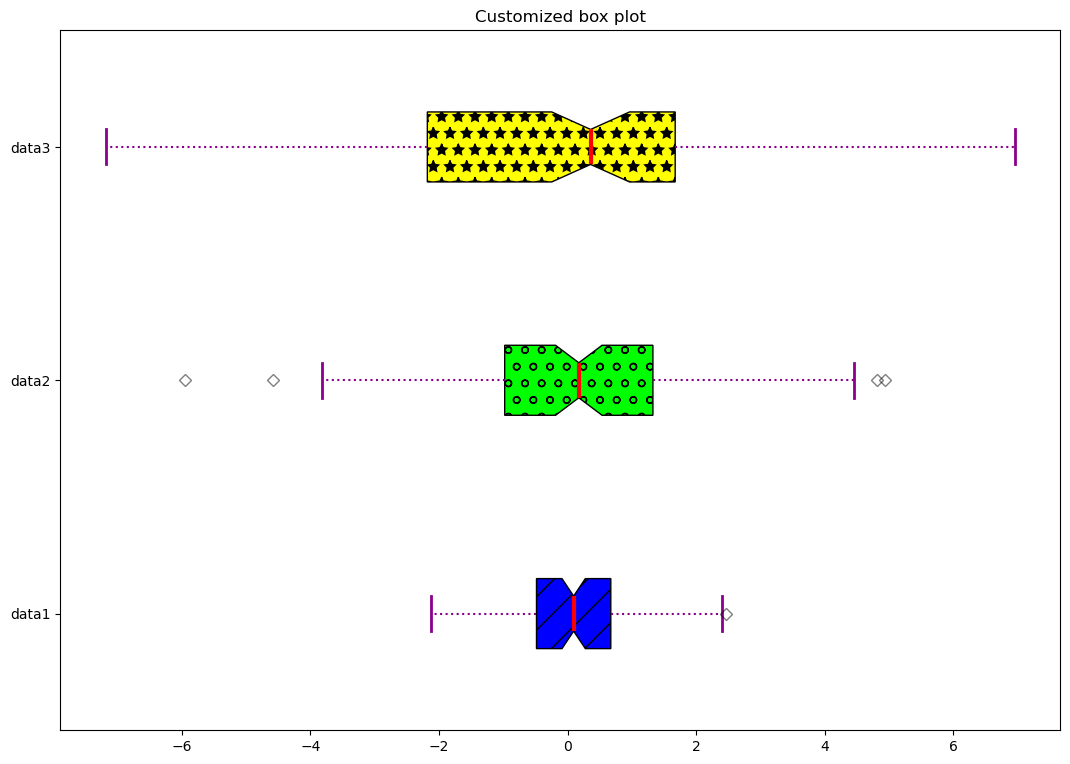

In [14]:
# import matplotlib.pyplot as plt
# import numpy as np

# Random data
np.random.seed(10)
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True, notch = True, vert = 0)

colors = ['#0000FF', '#00FF00', '#FFFF00']
hatches = ['/', 'o', '*']

for patch, color, hatch in zip(bp['boxes'], colors, hatches):
    patch.set_facecolor(color)
    patch.set_hatch(hatch)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# Changing color and line width of medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
               color ='#e7298a',
               alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['data1', 'data2', 'data3'])
 
# Adding title
plt.title("Customized box plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()